# GERMANY - Uppgift 1

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import hashlib
import importlib
import Functions
importlib.reload(Functions)

olympics = pd.read_csv('athlete_events.csv')
noc = pd.read_csv('noc_regions.csv')

In [114]:
germany = Functions.get_germany_with_hashed_names(olympics).reset_index(drop = True)
germany.head()

,ID,Hash_Names,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,133,341116996c59575b8e0a66ad3d42f5063c72c9d5fd8840...,M,NaN,NaN,NaN,Germany,GER,1900 Summer,1900,Summer,Paris,Gymnastics,Gymnastics Men's Individual All-Around,NaN
1,389,0740975bf9235edebcecc325eeff6e611f13de55abfc11...,M,45.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",NaN
2,389,0740975bf9235edebcecc325eeff6e611f13de55abfc11...,M,45.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Architect...",NaN
3,396,1acabc3b523678f8cd7b07dd38a5a0808f8d799b0a52c0...,F,25.0,165.0,55.0,Germany,GER,2008 Summer,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Individual All-Around,NaN
4,396,1acabc3b523678f8cd7b07dd38a5a0808f8d799b0a52c0...,F,25.0,165.0,55.0,Germany,GER,2008 Summer,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Team All-Around,NaN


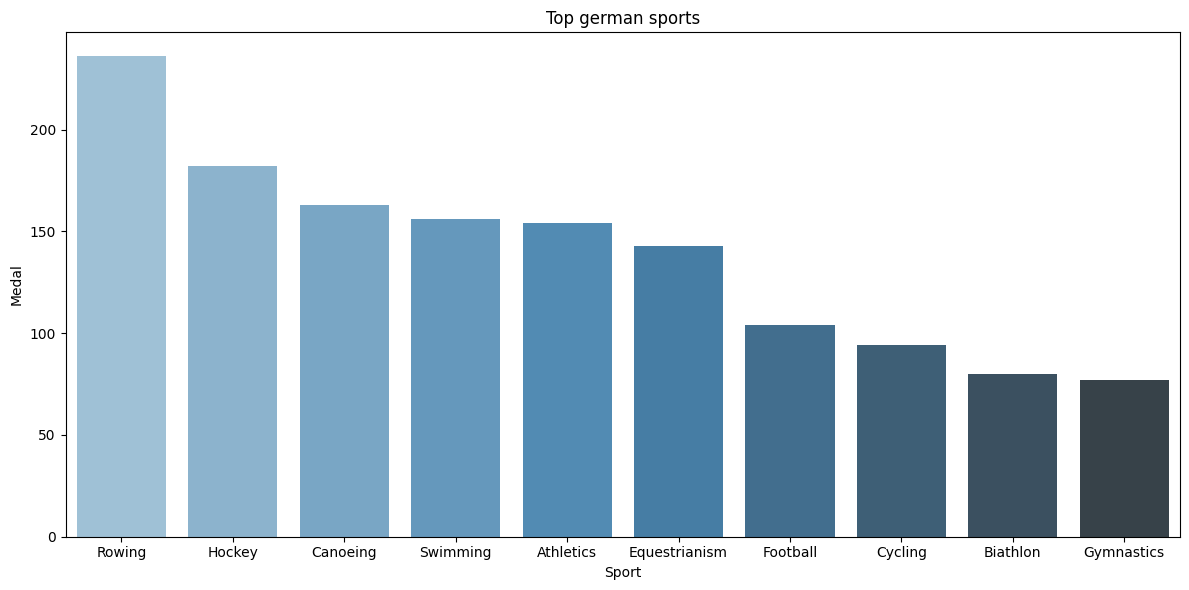

In [115]:
german_medals = germany[(germany["Medal"].notna())]
medals_per_sport = german_medals.groupby("Sport")["Medal"].count().reset_index()
top10 = medals_per_sport.sort_values(by='Medal', ascending= False).reset_index(drop=True).head(10)
plt.figure(figsize=(12,6))
sns.barplot(data=top10, x = 'Sport', y = 'Medal', hue='Sport', palette='Blues_d')
plt.title('Top german sports')
plt.tight_layout()

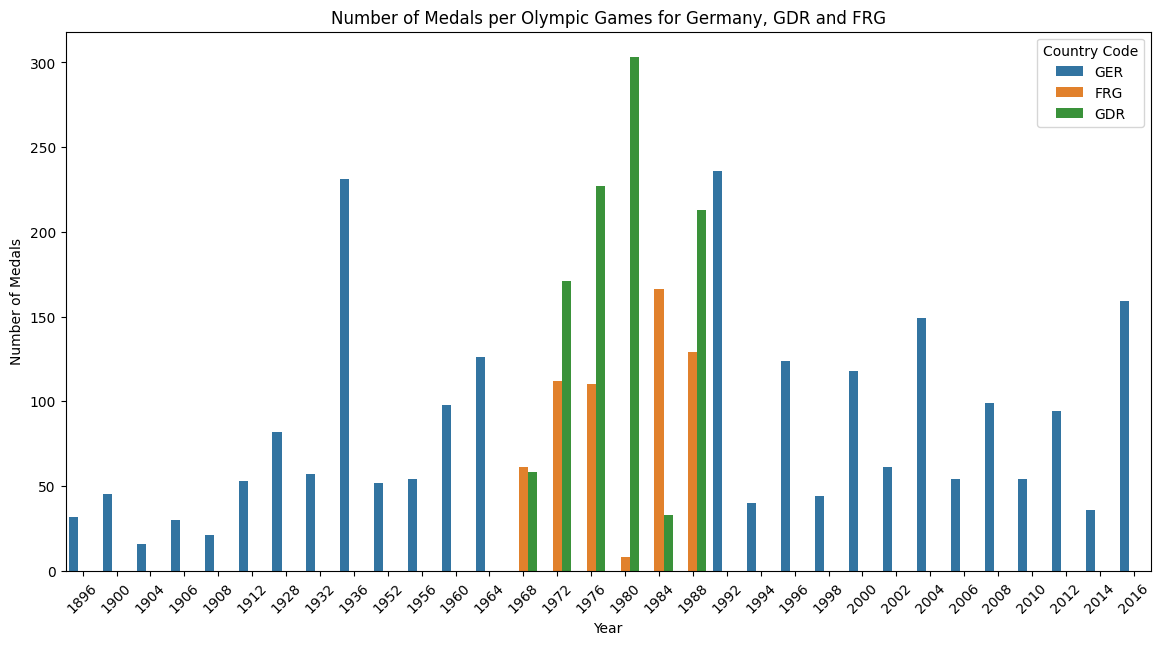

In [116]:
Functions.plot_medals_by_country(olympics, ["GER", "GDR", "FRG"], title = "Number of Medals per Olympic Games for Germany, GDR and FRG")


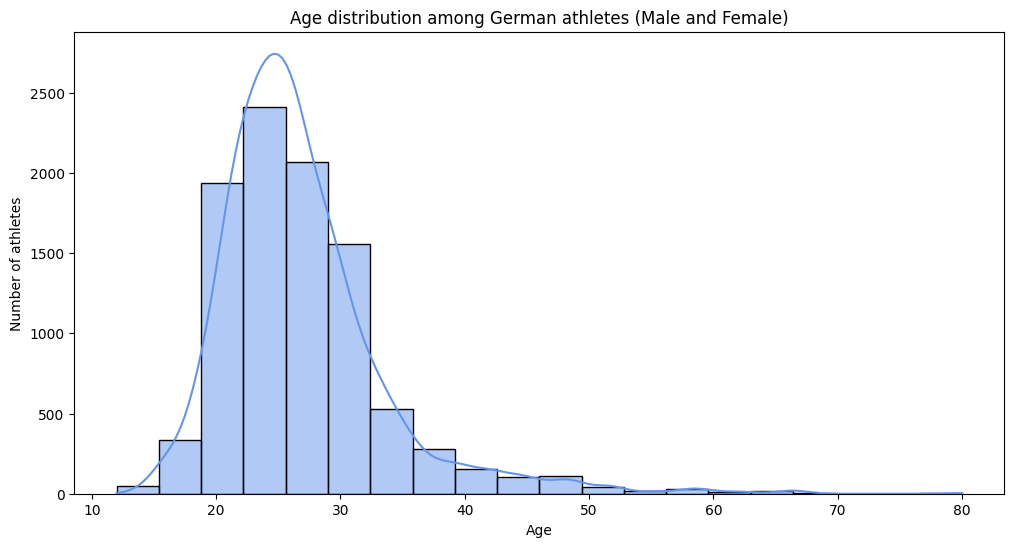

In [117]:
germany_age = germany[germany['Age'].notna()]

plt.figure(figsize=(12,6))
sns.histplot(data=germany_age, x='Age', bins=20, kde=True, color='cornflowerblue')
plt.title('Age distribution among German athletes (Male and Female)')
plt.xlabel('Age')
plt.ylabel('Number of athletes')
plt.show()

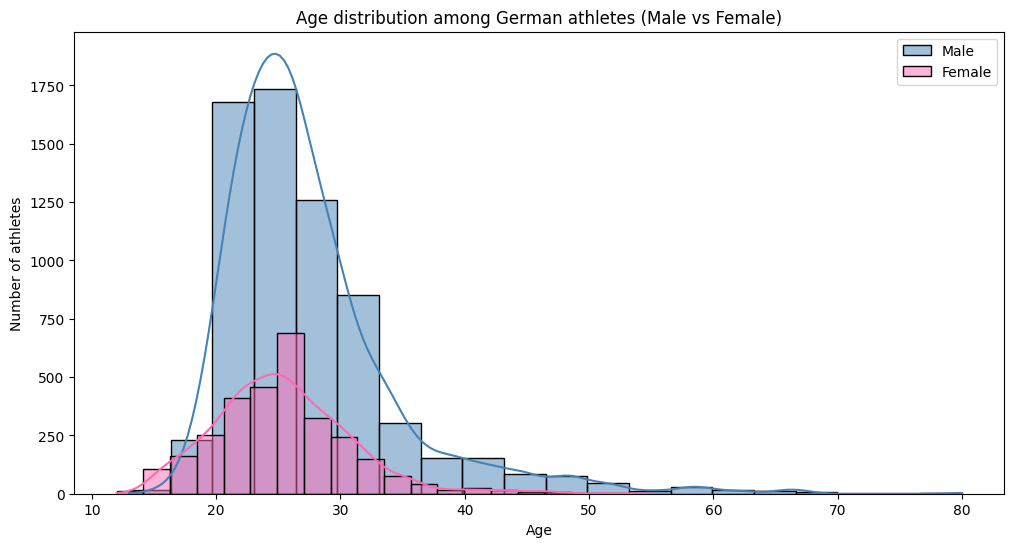

In [118]:
# personal note: alpha gör staplarna genomskinliga så man kan se båda samtidigt

plt.figure(figsize=(12,6))
sns.histplot(data=germany_age[germany_age['Sex'] == 'M'], x='Age', bins=20, kde=True, color='steelblue', label='Male', alpha=0.5)
sns.histplot(data=germany_age[germany_age['Sex'] == 'F'], x='Age', bins=20, kde=True, color='hotpink', label='Female', alpha=0.5)
plt.title('Age distribution among German athletes (Male vs Female)')
plt.xlabel('Age')
plt.ylabel('Number of athletes')
plt.legend()
plt.show()

## Väst och Öst-Tyskland

In [119]:
east_germany = olympics[olympics['NOC'] == 'GDR'].copy()
west_germany = olympics[olympics['NOC'] == 'FRG'].copy()

<Axes: xlabel='Sex', ylabel='Count'>

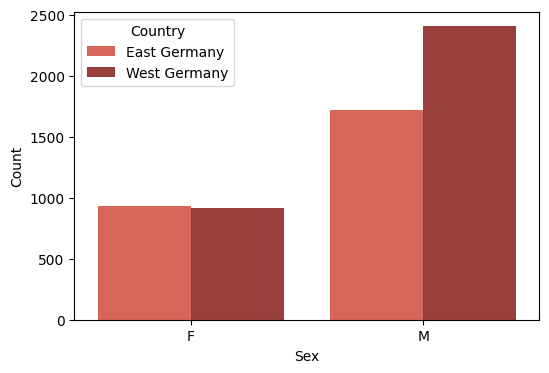

In [120]:
east_sex = east_germany['Sex'].value_counts().reset_index(name='East Germany')
west_sex = west_germany['Sex'].value_counts().reset_index(name='West Germany')
sex_comparison = east_sex.merge(west_sex, on = 'Sex', how ='outer')
long_format = sex_comparison.melt(id_vars = 'Sex', value_vars = ['East Germany', 'West Germany'], var_name = 'Country', value_name = 'Count')

plt.figure(figsize=(6,4))
sns.barplot(data=long_format, x = 'Sex', y = 'Count', hue = 'Country', palette = 'Reds_d')


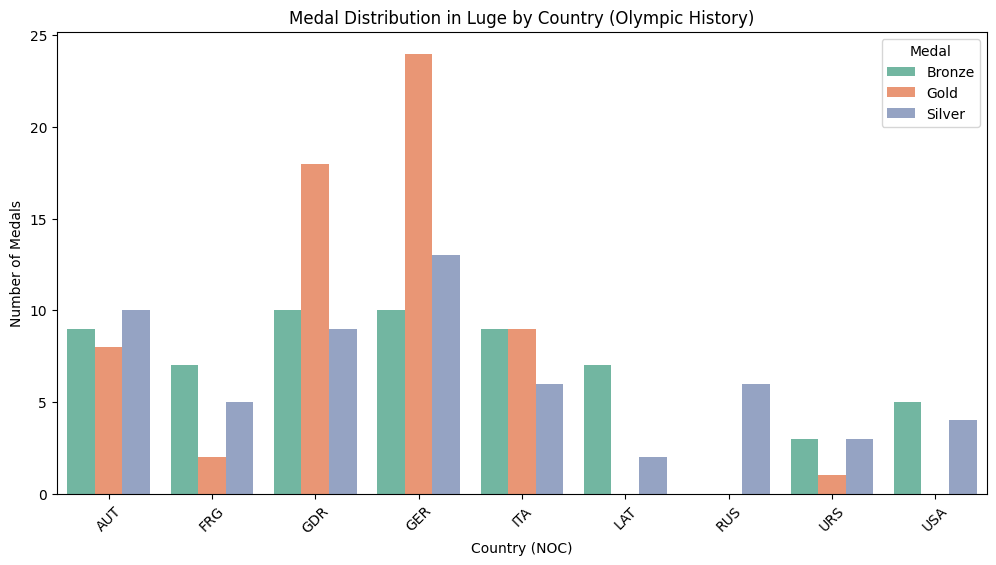

In [121]:
Functions.plot_medal_distribution_by_sport(olympics, "Luge")


C:\Users\samue\AppData\Local\Temp\ipykernel_3068\3808735941.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=medals_per_year, x="Year", y="Medal", palette="Blues")


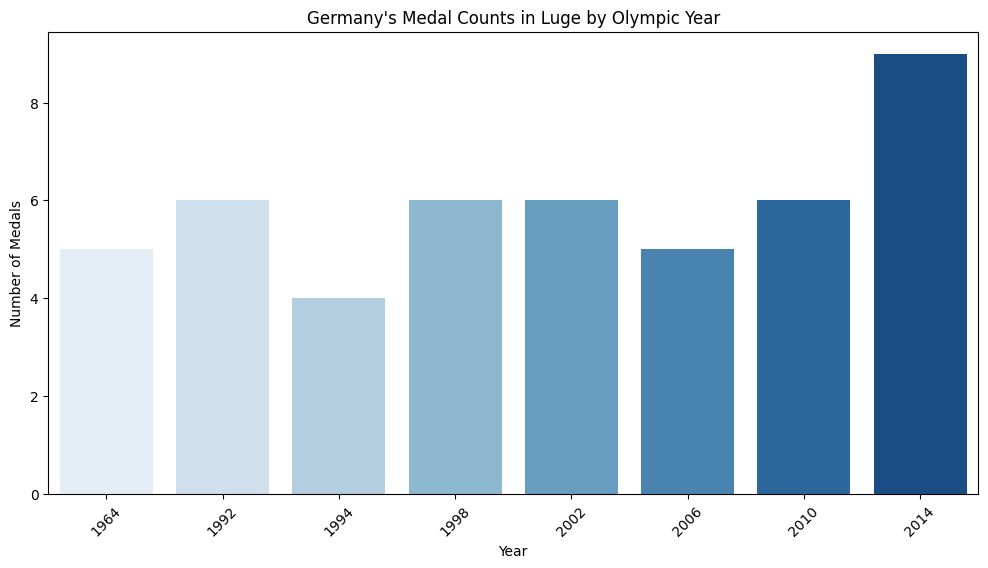

In [ ]:
luge_ger = olympics[(olympics["Sport"] == "Luge") & (olympics["Medal"].notna()) & (olympics["NOC"] == "GER")]
medals_per_year = luge_ger.groupby("Year")["Medal"].count().reset_index()
medals_per_year = medals_per_year.sort_values("Medal", ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data = medals_per_year, x = "Year", y = "Medal", palette = "Blues")
plt.title("Germany's Medal Counts in Luge by Olympic Year")
plt.xlabel("Year")
plt.ylabel("Number of Medals")
plt.xticks(rotation = 45)
plt.show()